In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

In [ ]:


df = pd.read_csv("kaggle_survey_2017_2021[1].csv", low_memory=False)

print(df.shape)
print(df.head())

(106302, 293)
      - Time from Start to Finish (seconds)                           Q1  \
0  Year               Duration (in seconds)  What is your age (# years)?   
1  2021                                 910                        50-54   
2  2021                                 784                        50-54   
3  2021                                 924                        22-24   
4  2021                                 575                        45-49   

                                       Q2  \
0  What is your gender? - Selected Choice   
1                                     Man   
2                                     Man   
3                                     Man   
4                                     Man   

                                          Q3  \
0  In which country do you currently reside?   
1                                      India   
2                                  Indonesia   
3                                   Pakistan   
4                 

In [ ]:
import pandas as pd

df = pd.read_csv("kaggle_survey_2017_2021[1].csv", skiprows=1, low_memory=False)

print(df.shape)
print(df.head())

(106301, 293)
   Year  Duration (in seconds) What is your age (# years)?  \
0  2021                  910.0                       50-54   
1  2021                  784.0                       50-54   
2  2021                  924.0                       22-24   
3  2021                  575.0                       45-49   
4  2021                  781.0                       45-49   

  What is your gender? - Selected Choice  \
0                                    Man   
1                                    Man   
2                                    Man   
3                                    Man   
4                                    Man   

  In which country do you currently reside?  \
0                                     India   
1                                 Indonesia   
2                                  Pakistan   
3                                    Mexico   
4                                     India   

  What is the highest level of formal education that you have att

In [ ]:
df = df.drop_duplicates()
df = df.dropna(axis=0, how="all")
df = df.dropna(axis=1, how="all")
df = df.fillna("Unknown")
print("After cleaning ")
print(df.shape)
print(df.head())
print(df.columns)

After cleaning 
(101845, 276)
   Year Duration (in seconds) What is your age (# years)?  \
0  2021                 910.0                       50-54   
1  2021                 784.0                       50-54   
2  2021                 924.0                       22-24   
3  2021                 575.0                       45-49   
4  2021                 781.0                       45-49   

  What is your gender? - Selected Choice  \
0                                    Man   
1                                    Man   
2                                    Man   
3                                    Man   
4                                    Man   

  In which country do you currently reside?  \
0                                     India   
1                                 Indonesia   
2                                  Pakistan   
3                                    Mexico   
4                                     India   

  What is the highest level of formal education that yo


Respondents per Year:
 Year
2017    12301
2018    23841
2019    19713
2020    20017
2021    25973
Name: count, dtype: int64


/tmp/ipython-input-3852778156.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=year_counts.index, y=year_counts.values, palette="viridis")


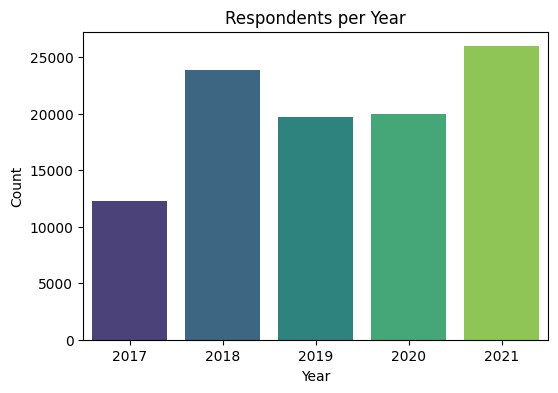

In [ ]:
year_counts = df["Year"].value_counts().sort_index()
print("\nRespondents per Year:\n", year_counts)

plt.figure(figsize=(6,4))
sns.barplot(x=year_counts.index, y=year_counts.values, palette="viridis")
plt.title("Respondents per Year")
plt.ylabel("Count")
plt.show()


Gender Distribution (cleaned):
 What is your gender? - Selected Choice
Male                       81588
Female                     18328
Prefer not to say           1276
prefer to self-describe      224
non-binary                   214
other                        153
Unknown                       62
Name: count, dtype: int64


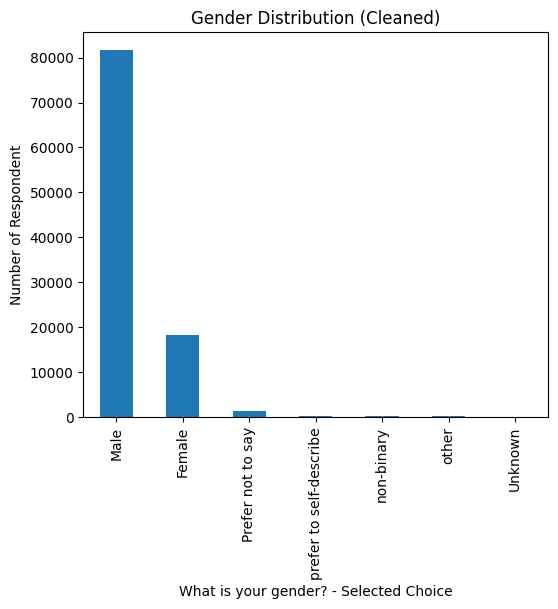

In [ ]:
gender_col = "What is your gender? - Selected Choice"

df[gender_col] = df[gender_col].str.lower().str.strip()

mapping = {
    "male": "Male",
    "man": "Male",
    "female": "Female",
    "woman": "Female",
    "non-binary, genderqueer, or gender non-conforming": "Non-binary",
    "prefer not to say": "Prefer not to say",
    "unknown": "Unknown",
    "a different identity": "Other",
    "nonbinary": "Non-binary"

}

df[gender_col] = df[gender_col].map(mapping).fillna(df[gender_col])


gender_counts = df[gender_col].value_counts()
print("\nGender Distribution (cleaned):\n", gender_counts)

gender_counts.plot(kind="bar",  figsize=(6,5), title="Gender Distribution (Cleaned)")
plt.ylabel("Number of Respondent")
plt.show()


Top 10 Countries (cleaned):
 In which country do you currently reside?
India             23936
United States     15191
Other              5532
China              3502
Russia             3299
Brazil             3283
Japan              3070
United Kingdom     2651
Germany            2521
France             2070
Name: count, dtype: int64


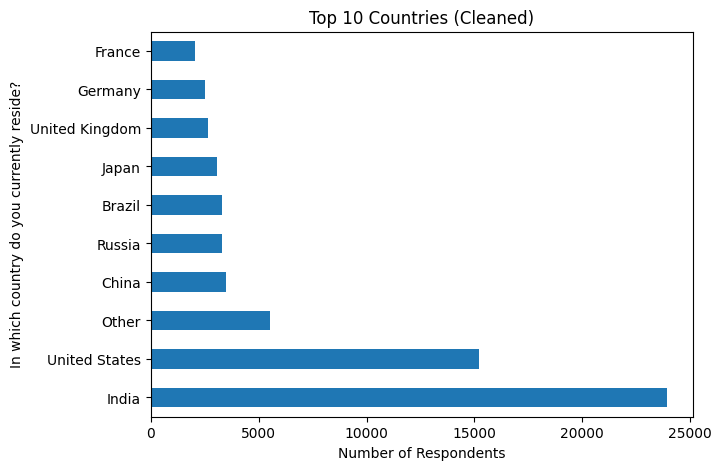

In [ ]:
country_col = "In which country do you currently reside?"
if country_col in df.columns:
    df[country_col] = df[country_col].str.lower().str.strip()
    country_map = {
        "us": "United States", "usa": "United States", "united states of america": "United States",
        "uk": "United Kingdom", "united kingdom of great britain and northern ireland": "United Kingdom",
        "uae": "United Arab Emirates", "emirates": "United Arab Emirates",
        "egypt": "Egypt", "arab republic of egypt": "Egypt",
        "unknown": "Unknown"
    }
    df[country_col] = df[country_col].map(country_map).fillna(df[country_col]).str.title()

    country_counts = df[country_col].value_counts().head(10)
    print("\nTop 10 Countries (cleaned):\n", country_counts)

    # Horizontal bar chart
    country_counts.plot(kind="barh", figsize=(7,5), title="Top 10 Countries (Cleaned)")
    plt.xlabel("Number of Respondents")
    plt.show()


Education Levels (cleaned):
 What is the highest level of formal education that you have attained or plan to attain within the next 2 years?
Masterâ€™S Degree                                                      37391
Bachelorâ€™S Degree                                                    29952
Phd                                                                    13146
Master'S Degree                                                         4933
Some College/University Study Without Earning A Bachelorâ€™S Degree     4631
Bachelor'S Degree                                                       3474
Professional Degree                                                     2350
Unknown                                                                 1839
I Prefer Not To Answer                                                  1787
High School                                                             1122
Some College/University Study Without Earning A Bachelor'S Degree        653
Professiona

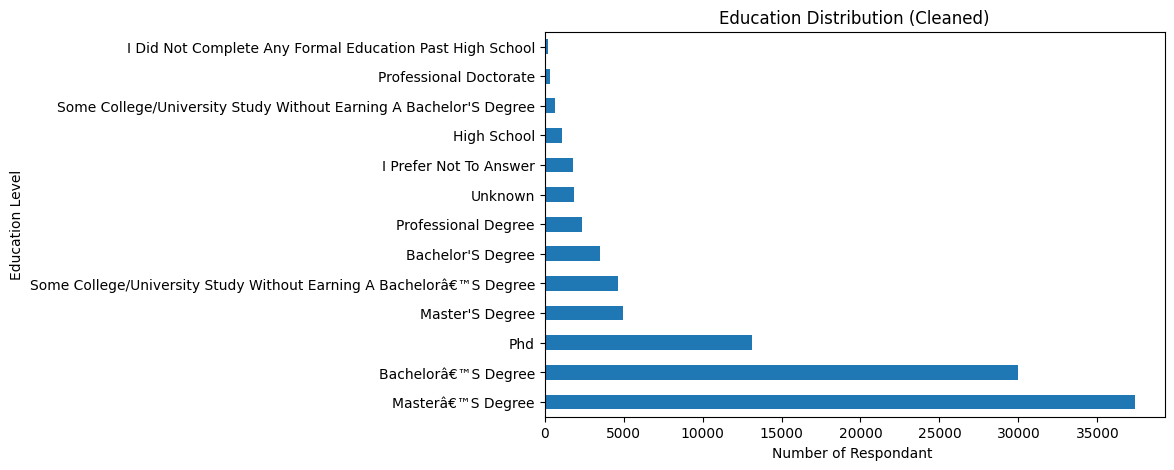

In [ ]:
edu_col = "What is the highest level of formal education that you have attained or plan to attain within the next 2 years?"
if edu_col in df.columns:
    df[edu_col] = df[edu_col].str.lower().str.strip()
    edu_map = {
        "bachelor’s degree": "Bachelor's", "bachelors degree": "Bachelor's",
        "master’s degree": "Master's", "masters degree": "Master's",
        "doctoral degree": "PhD", "phd": "PhD",
        "some college/university study without bachelor’s degree": "Undergraduate",
        "no formal education past high school": "High School",
        "unknown": "Unknown"
    }
    df[edu_col] = df[edu_col].map(edu_map).fillna(df[edu_col]).str.title()

    edu_counts = df[edu_col].value_counts()
    print("\nEducation Levels (cleaned):\n", edu_counts)


    edu_counts.plot(kind="barh",  figsize=(8,5), title="Education Distribution (Cleaned)")
    plt.xlabel("Number of Respondant ")
    plt.ylabel("Education Level")
    plt.show()


Respondents per Year:
 Year
2017    12301
2018    23841
2019    19713
2020    20017
2021    25973
Name: count, dtype: int64


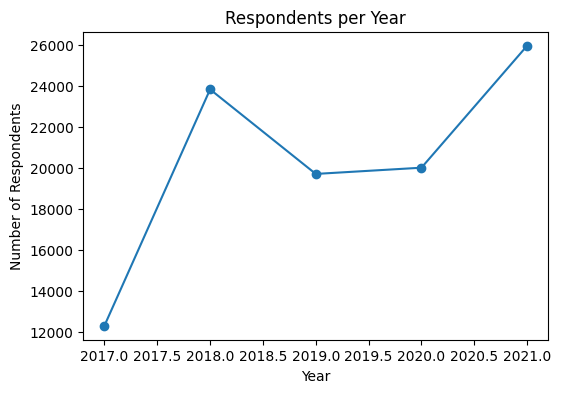

In [ ]:
if "Year" in df.columns:
    year_counts = df["Year"].value_counts().sort_index()
    print("\nRespondents per Year:\n", year_counts)

    # Line chart
    year_counts.plot(kind="line", marker="o", figsize=(6,4), title="Respondents per Year")
    plt.ylabel("Number of Respondents")
    plt.xlabel("Year")
    plt.show()

/tmp/ipython-input-290237896.py:15: UserWarning: Tight layout not applied. tight_layout cannot make Axes height small enough to accommodate all Axes decorations.
  plt.tight_layout()


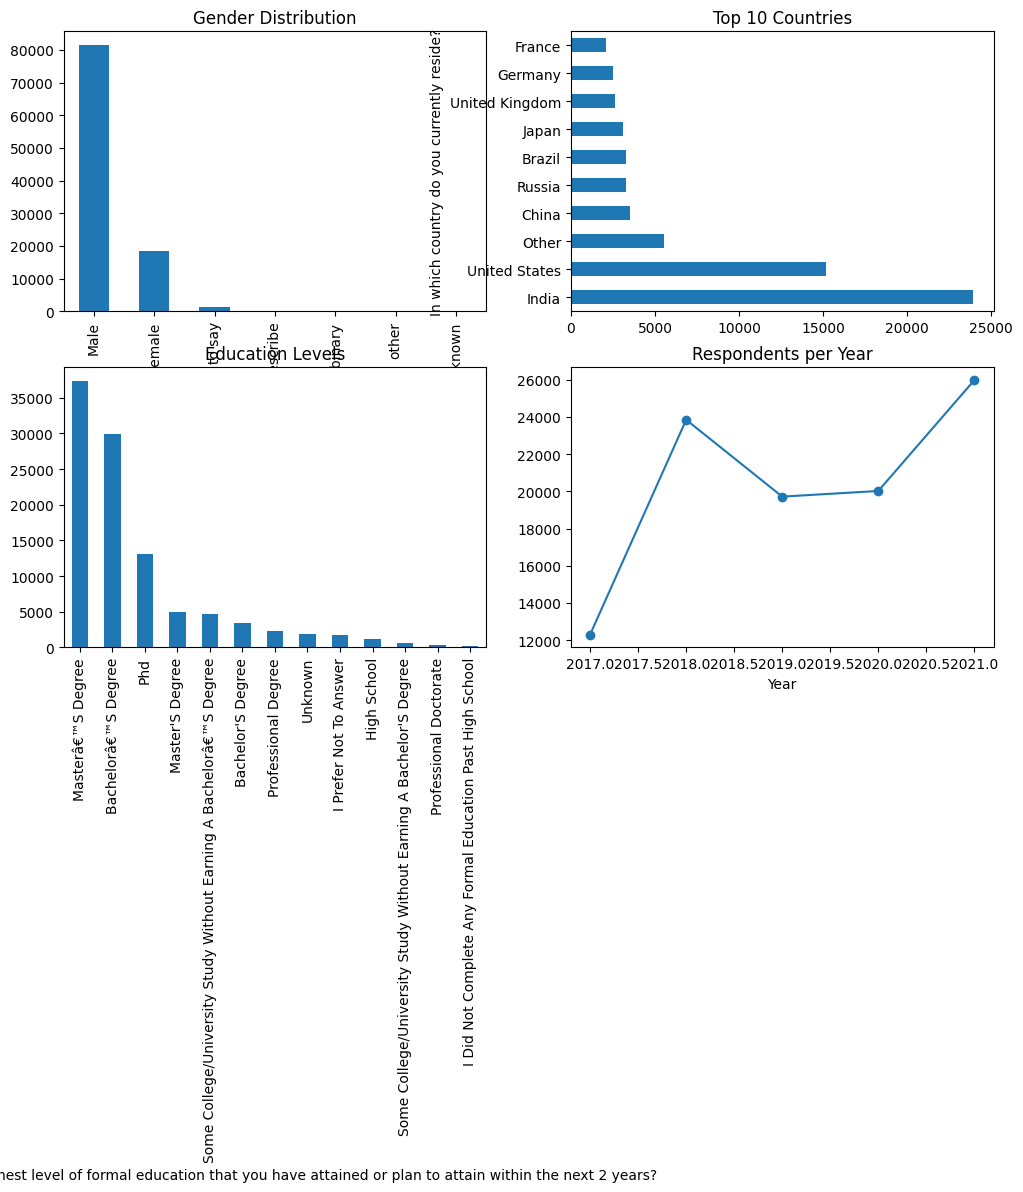

In [ ]:
fig, axs = plt.subplots(2, 2, figsize=(12,8))

# Gender
gender_counts.plot(kind="bar", ax=axs[0,0], title="Gender Distribution")

# Country
country_counts.plot(kind="barh", ax=axs[0,1], title="Top 10 Countries")

# Education
edu_counts.plot(kind="bar", ax=axs[1,0], title="Education Levels")

# Year
year_counts.plot(kind="line", marker="o", ax=axs[1,1], title="Respondents per Year")

plt.tight_layout()
plt.show()